## Observations and Insights 

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Display the data table for preview
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [77]:
# Checking the number of mice.
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [78]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [79]:
# Optional: Get all the data for the duplicate mouse ID. 

merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merge_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
# Checking the number of mice in the clean DataFrame.
merge_data_sort = merge_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

merge_data_sort.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = merge_data_sort.groupby(["Drug Regimen"])
regimen_grouped
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

# Assemble the resulting series into a single summary dataframe.
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()


In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({ 
    "Mean": regimen_mean, "Median": regimen_median,
    "Variance": regimen_variance , "Standard Deviation": regimen_std, 
    "SEM": regimen_sem})

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

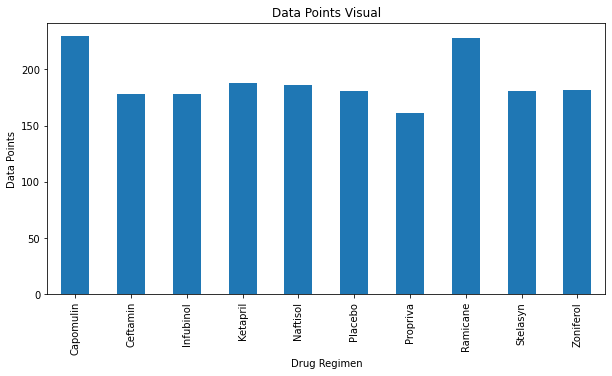

<Figure size 432x288 with 0 Axes>

In [84]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_data_points = merge_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points
regimen_data_points.plot(kind="bar", figsize=(10,5))
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

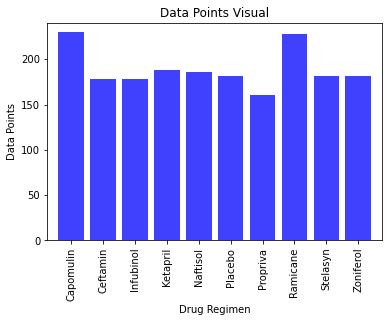

In [85]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Create an arraw with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

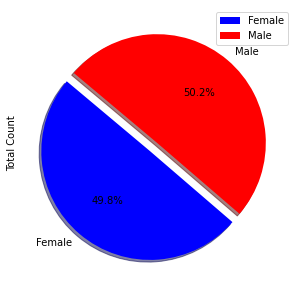

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#plot = name of the data frame .plot.pie (sumplots true)
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

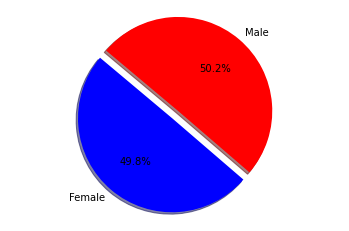

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['blue', 'red']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimes = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

# Start by getting the last (greatest) timepoint for each mouse
best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]





# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
best_regimes_data.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


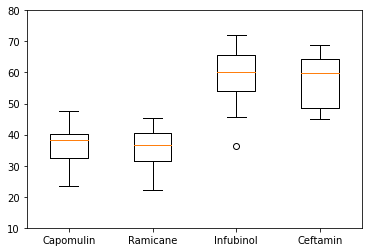

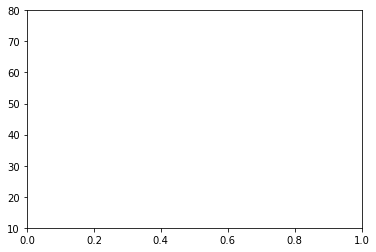

In [89]:
# Put treatments into a list for for loop (and later for plot labels)
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()
#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()



# Create empty list to fill with tumor vol data (for plotting)
tumor_list_df = pd.DataFrame(tumor_lists)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_list = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

 
    
# add subset 
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
    
    # Determine outliers using upper and lower bounds

plt.ylim(10, 80)
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1f2786d1400>,
 'caps': [<matplotlib.lines.Line2D at 0x1f27872c3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2797233d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1f27872cfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f2786bceb0>,
 'means': []}

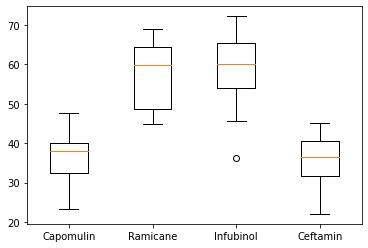

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_list_df = tumor_list_df.reindex(top_4)
plt.boxplot(tumor_vols, labels=top_4)


## Line and Scatter Plots

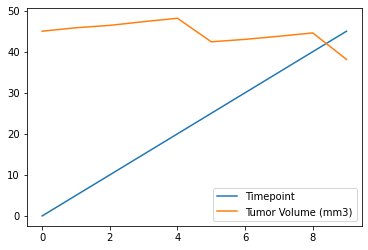

In [91]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_vs_tumer = merge_data[merge_data["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

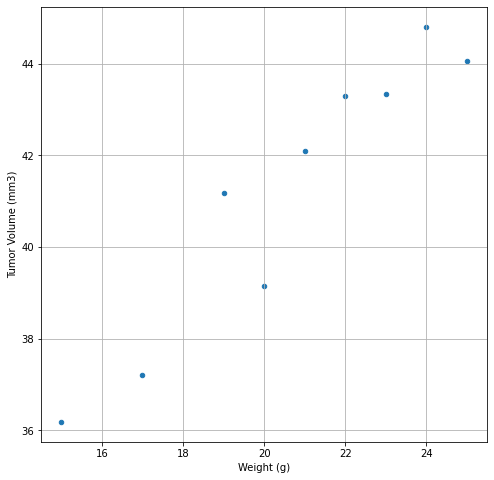

In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = merge_data[merge_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#show scatter
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))


## Correlation and Regression

NameError: name 'regression_model' is not defined

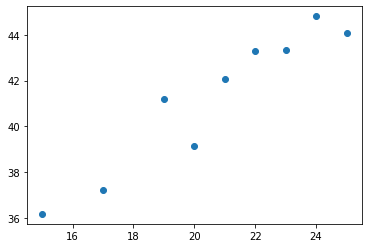

In [93]:
# Calculate the correlation coefficient and linear regression model 
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]


plt.scatter(x_values, y_values)

plt.annotate(regression_model,(6,10),fontsize=10,color="red")

# for mouse weight and average tumor volume for the Capomulin regimen
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()